<a href="https://colab.research.google.com/github/Suneel-coder/EdunetIBM/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data Cleaning***

In [ ]:
import pandas as pd
# Load the dataset and check whether there are any null values or not
file_path = "/content/Salary Data_1.csv"
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


(None,
     Age  Gender Education Level          Job Title  Years of Experience  \
 0  32.0    Male      Bachelor's  Software Engineer                  5.0   
 1  28.0  Female        Master's       Data Analyst                  3.0   
 2  45.0    Male             PhD     Senior Manager                 15.0   
 3  36.0  Female      Bachelor's    Sales Associate                  7.0   
 4  52.0    Male        Master's           Director                 20.0   
 
      Salary  
 0   90000.0  
 1   65000.0  
 2  150000.0  
 3   60000.0  
 4  200000.0  )

In [ ]:
# Check for any null values in the columns and remove them using median or mean or any constant values
missing_values = df.isnull().sum()
df_cleaned = df.dropna()
cleaned_null_check = df_cleaned.isnull().sum()
rows_removed = len(df) - len(df_cleaned)
missing_values, cleaned_null_check, rows_removed

(Age                    2
 Gender                 2
 Education Level        2
 Job Title              2
 Years of Experience    2
 Salary                 2
 dtype: int64,
 Age                    0
 Gender                 0
 Education Level        0
 Job Title              0
 Years of Experience    0
 Salary                 0
 dtype: int64,
 2)

***Outlier Detection and Removal Using Quartile Method***

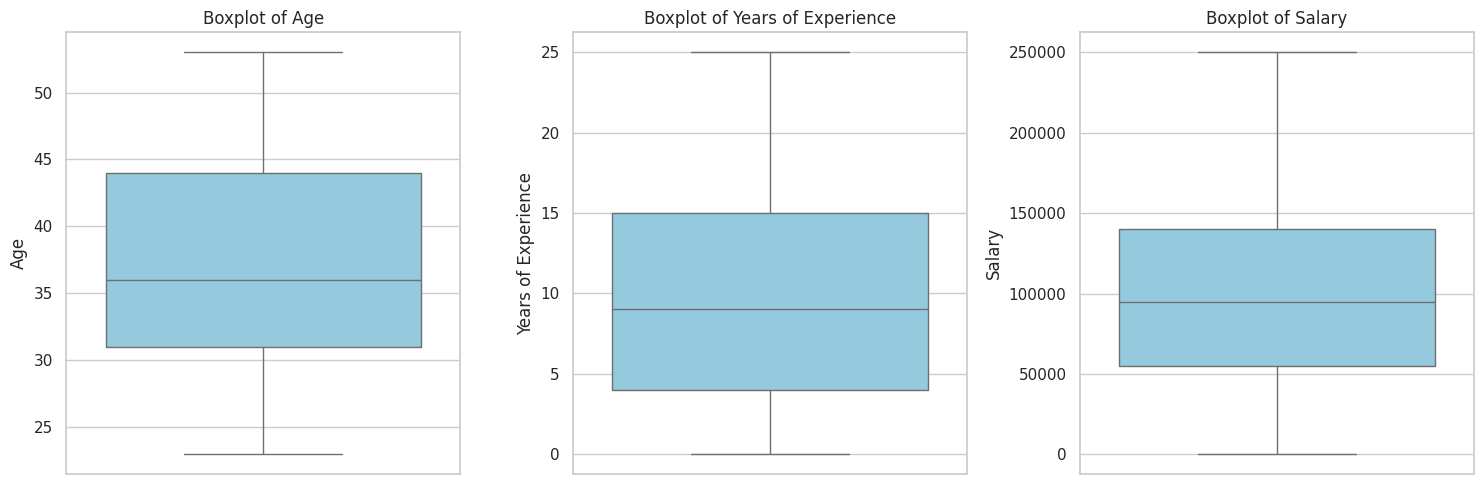

In [ ]:
# this gives the visual representation of the outliers that are present but in this case there are no outliers

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
numeric_cols = ['Age', 'Years of Experience', 'Salary']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_cleaned, y=col, color='skyblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower) & (dataframe[col] <= upper)]
    return dataframe
numeric_cols = ['Age', 'Years of Experience', 'Salary']
df_no_outliers = remove_outliers_iqr(df_cleaned, numeric_cols)
rows_removed_outliers = len(df_cleaned) - len(df_no_outliers)
df_no_outliers.describe(), rows_removed_outliers

(              Age  Years of Experience         Salary
 count  373.000000           373.000000     373.000000
 mean    37.431635            10.030831  100577.345845
 std      7.069073             6.557007   48240.013482
 min     23.000000             0.000000     350.000000
 25%     31.000000             4.000000   55000.000000
 50%     36.000000             9.000000   95000.000000
 75%     44.000000            15.000000  140000.000000
 max     53.000000            25.000000  250000.000000,
 0)

***Training and Spliting the data***

In [ ]:
# now we have to encode the columns where it is like categorical like yes or no and we have to assign 0 or 1 to that column for easy understanding for the machine
from sklearn.preprocessing import LabelEncoder
df_encoded = df_no_outliers.copy()
label_cols = ['Gender', 'Education Level', 'Job Title']
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
# now split the features and target what we are predicting
X = df_encoded.drop("Salary", axis=1)
y = df_encoded["Salary"]

In [ ]:
# now after doing this we need divide the data set for training and testing
# here i am using cross fold validation so that there be will minimum error because one fold validation may miss the main
# features in the test set and results in bad accuracy
# so by using this we give every set to the testing and training to overcome this problem
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)

(298, 5) (75, 5)


***Model Training and Evaluation***

I defined a dictionary where it contains all the regression model

I now defined a pipeline because normally pipeline is a way to organize and automate steps in modelling process

In that i gave StandardScaler and Regressor

Now just i did the basic model training and did the prediction process

Here i used 2 metrics R2 and MAE (Mean Absoulte Error)

because R2 is used to Measure how well the model explains the variability of the target variable.

and MAE is used to Measure average of absolute errors between predicted and actual values Which gives a clear idea of how wrong predictions are on average

In [ ]:
# here i am defining different regression models because to get the best model which gives us the best accuracy
# by this our model will work perfectly


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Define regression models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "GradientBoosting": GradientBoostingRegressor()
}

results = {}
best_model = None
best_score = -1
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = r2
    print(f"{name} - R² Score: {r2:.4f}, MAE: {mae:.2f}")

    if r2 > best_score:
        best_score = r2
        best_model = pipe
        best_model_name = name
joblib.dump(best_model, "best_salary_model.pkl")
print(f"\n Best model: {best_model_name} (R² = {best_score:.4f}) saved as best_salary_model.pkl")

LinearRegression - R² Score: 0.8961, MAE: 10928.92
RandomForest - R² Score: 0.9350, MAE: 8854.56
KNN - R² Score: 0.8938, MAE: 10679.07
SVM - R² Score: -0.0220, MAE: 40502.98
GradientBoosting - R² Score: 0.9269, MAE: 8908.62

 Best model: RandomForest (R² = 0.9350) saved as best_salary_model.pkl


***Graph Plotting***

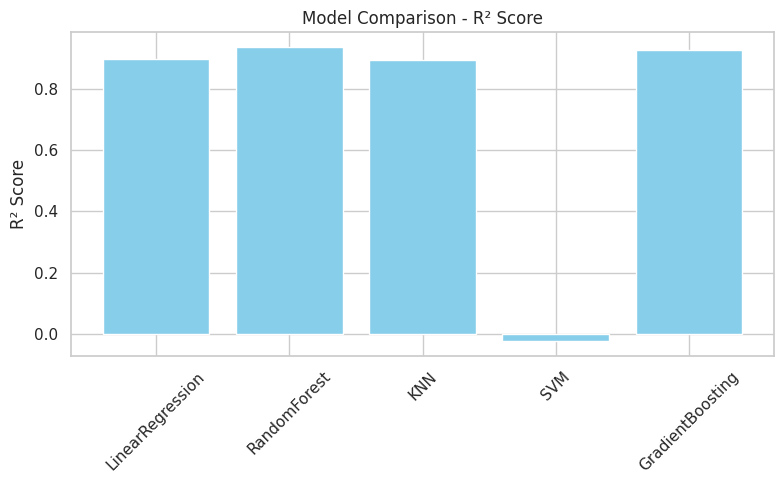

In [ ]:
# Plot model R² scores
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Salary Prediction

In [ ]:
import pandas as pd

df = pd.read_csv("Salary Data_1.csv")
print(df.columns.tolist())


['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder

model = joblib.load("best_salary_model.pkl")

df = pd.read_csv("Salary Data_1.csv")
job_titles = df["Job Title"].unique().tolist()

job_encoder = LabelEncoder()
job_encoder.fit(job_titles)

# now i am trying to get inputs from the user
try:
    age_input = input("Enter Age: ").strip()
    experience_input = input("Enter Years of Experience: ").strip()
    job_title = input("Enter Job Title: ").strip()
    gender_input = input("Enter Gender (Male/Female): ").strip().lower()

    age = float(age_input)
    experience = float(experience_input)
    if job_title not in job_titles:
        print(f"❌ Error: '{job_title}' is not a recognized job title.")
        print(f"👉 Available options: {', '.join(job_titles)}")
        exit()

    if gender_input == "male":
        gender = 1
    elif gender_input == "female":
        gender = 0
    else:
        print("❌ Error: Gender must be 'Male' or 'Female'.")
        exit()

    job_encoded = job_encoder.transform([job_title])[0]

    education_level = 2  # Bachelor's Degree

    input_df = pd.DataFrame([[
        age,
        gender,
        education_level,
        job_encoded,
        experience
    ]], columns=[
        'Age',
        'Gender',
        'Education Level',
        'Job Title',
        'Years of Experience'
    ])
# Here i am predicting the salary of that employee
    predicted_salary = model.predict(input_df)[0]
    print(f"\nPredicted Salary: ₹{predicted_salary:,.2f}")

except ValueError as e:
    print(f"Invalid input! Error details: {e}")
    print(f"You entered: Age = '{age_input}', Experience = '{experience_input}'")


Enter Age: 25
Enter Years of Experience: 2
Enter Job Title: Software Engineer
Enter Gender (Male/Female): Male

💰 Predicted Salary: ₹50,650.00
